In [1]:
import numpy as np
import pandas as pd
import sdv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sdv.__version__

'1.0.0b0'

In [2]:
real_data=pd.read_csv('UCI_Credit_Card.csv')
real_data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [3]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

2nd ,3rd ,4th ,24th column must be categorical variables. so we have to change their data type.

In [4]:
real_data[['SEX','EDUCATION','MARRIAGE','default.payment.next.month']]=real_data[['SEX','EDUCATION','MARRIAGE','default.payment.next.month']].astype(str)

In [5]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(real_data)

/home/arnab/.local/lib/python3.10/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  a = (self.min - loc) / scale
/home/arnab/.local/lib/python3.10/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  b = (self.max - loc) / scale


In [7]:
new_data = model.sample(num_rows=30000)

In [8]:
new_data.head()

ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0  27866    64534.0   2         2        2   35     -1     -1     -1     -1   
1   4775    76451.0   2         2        2   30      1      1      1      1   
2    471    94736.0   1         1        1   26     -1     -1     -1     -2   
3  10039    13404.0   2         2        2   37      2      2      3      2   
4   3606   386637.0   2         1        2   33     -1      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...    23487.0    26070.0    67502.0    3895.0    2073.0   11248.0   
1  ...    35803.0    -6479.0    26555.0   12118.0   15693.0   16370.0   
2  ...   -49362.0   -41929.0   -30012.0   13828.0    4133.0   15374.0   
3  ...   132706.0   105898.0   122919.0   17755.0   40816.0    8157.0   
4  ...    14524.0   -30387.0   -24625.0   27448.0   20846.0   12031.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0   16825.0   14093.0   17387.0                           1  
1    5405.0   19391.0    9629.0                           0  
2   11262.0    6266.0   14130.0                           0  
3   24729.0   20886.0   15038.0                           0  
4    2213.0    7601.0   18487.0                           0  

[5 rows x 25 columns]

In [9]:
new_data.describe(include='all')

ID      LIMIT_BAL    SEX EDUCATION MARRIAGE           AGE  \
count   30000.000000   30000.000000  30000     30000    30000  30000.000000   
unique           NaN            NaN      2         7        4           NaN   
top              NaN            NaN      2         2        2           NaN   
freq             NaN            NaN  18942     13999    16226           NaN   
mean    15034.218700  207995.905200    NaN       NaN      NaN     35.495433   
std      8608.555583  136417.313505    NaN       NaN      NaN      9.264839   
min         2.000000   10009.000000    NaN       NaN      NaN     21.000000   
25%      7588.750000   98648.000000    NaN       NaN      NaN     28.000000   
50%     15065.000000  185897.000000    NaN       NaN      NaN     34.000000   
75%     22450.000000  293954.000000    NaN       NaN      NaN     41.000000   
max     30000.000000  895831.000000    NaN       NaN      NaN     78.000000   

               PAY_0        PAY_2         PAY_3         PAY_4  ...  \
count   30000.000000  30000.00000  30000.000000  30000.000000  ...   
unique           NaN          NaN           NaN           NaN  ...   
top              NaN          NaN           NaN           NaN  ...   
freq             NaN          NaN           NaN           NaN  ...   
mean       -0.029067     -0.15100     -0.187267     -0.237267  ...   
std         1.172377      1.24418      1.240396      1.218012  ...   
min        -2.000000     -2.00000     -2.000000     -2.000000  ...   
25%        -1.000000     -1.00000     -1.000000     -1.000000  ...   
50%         0.000000      0.00000      0.000000      0.000000  ...   
75%         1.000000      1.00000      1.000000      1.000000  ...   
max         7.000000      6.00000      6.000000      6.000000  ...   

            BILL_AMT4      BILL_AMT5      BILL_AMT6      PAY_AMT1  \
count    30000.000000   30000.000000   30000.000000  30000.000000   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean     43223.350900   40147.362533   38891.853033  13967.631200   
std      64233.120032   61025.919700   59772.658883  10611.896484   
min    -168282.000000  -81302.000000 -182627.000000      1.000000   
25%        167.750000   -4551.750000   -1114.750000   5556.750000   
50%      43002.000000   36987.000000   39012.000000  11805.500000   
75%      85913.500000   80907.500000   78671.000000  20007.000000   
max     320013.000000  313010.000000  278680.000000  67039.000000   

             PAY_AMT2     PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6  \
count    30000.000000  30000.00000  30000.000000  30000.000000  30000.000000   
unique            NaN          NaN           NaN           NaN           NaN   
top               NaN          NaN           NaN           NaN           NaN   
freq              NaN          NaN           NaN           NaN           NaN   
mean     19007.009033  14595.93530  13050.549667  12710.240333  14758.223467   
std      14351.589304  10969.45832   9961.097680   9597.954979  11190.677865   
min          0.000000      0.00000      1.000000      0.000000      0.000000   
25%       7554.000000   5865.00000   5216.750000   5035.750000   5886.750000   
50%      16213.000000  12431.50000  10931.500000  10755.500000  12447.000000   
75%      27414.250000  21080.25000  18725.500000  18301.000000  21174.500000   
max     110260.000000  75908.00000  68946.000000  75826.000000  83623.000000   

        default.payment.next.month  
count                        30000  
unique                           2  
top                              0  
freq                         25809  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                            

In [10]:
real_data.describe(include='all')

ID       LIMIT_BAL    SEX EDUCATION MARRIAGE           AGE  \
count   30000.000000    30000.000000  30000     30000    30000  30000.000000   
unique           NaN             NaN      2         7        4           NaN   
top              NaN             NaN      2         2        2           NaN   
freq             NaN             NaN  18112     14030    15964           NaN   
mean    15000.500000   167484.322667    NaN       NaN      NaN     35.485500   
std      8660.398374   129747.661567    NaN       NaN      NaN      9.217904   
min         1.000000    10000.000000    NaN       NaN      NaN     21.000000   
25%      7500.750000    50000.000000    NaN       NaN      NaN     28.000000   
50%     15000.500000   140000.000000    NaN       NaN      NaN     34.000000   
75%     22500.250000   240000.000000    NaN       NaN      NaN     41.000000   
max     30000.000000  1000000.000000    NaN       NaN      NaN     79.000000   

               PAY_0         PAY_2         PAY_3         PAY_4  ...  \
count   30000.000000  30000.000000  30000.000000  30000.000000  ...   
unique           NaN           NaN           NaN           NaN  ...   
top              NaN           NaN           NaN           NaN  ...   
freq             NaN           NaN           NaN           NaN  ...   
mean       -0.016700     -0.133767     -0.166200     -0.220667  ...   
std         1.123802      1.197186      1.196868      1.169139  ...   
min        -2.000000     -2.000000     -2.000000     -2.000000  ...   
25%        -1.000000     -1.000000     -1.000000     -1.000000  ...   
50%         0.000000      0.000000      0.000000      0.000000  ...   
75%         0.000000      0.000000      0.000000      0.000000  ...   
max         8.000000      8.000000      8.000000      8.000000  ...   

            BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    30000.000000   30000.000000   30000.000000   30000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean     43262.948967   40311.400967   38871.760400    5663.580500   
std      64332.856134   60797.155770   59554.107537   16563.280354   
min    -170000.000000  -81334.000000 -339603.000000       0.000000   
25%       2326.750000    1763.000000    1256.000000    1000.000000   
50%      19052.000000   18104.500000   17071.000000    2100.000000   
75%      54506.000000   50190.500000   49198.250000    5006.000000   
max     891586.000000  927171.000000  961664.000000  873552.000000   

            PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count   3.000000e+04   30000.00000   30000.000000   30000.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean    5.921163e+03    5225.68150    4826.076867    4799.387633   
std     2.304087e+04   17606.96147   15666.159744   15278.305679   
min     0.000000e+00       0.00000       0.000000       0.000000   
25%     8.330000e+02     390.00000     296.000000     252.500000   
50%     2.009000e+03    1800.00000    1500.000000    1500.000000   
75%     5.000000e+03    4505.00000    4013.250000    4031.500000   
max     1.684259e+06  896040.00000  621000.000000  426529.000000   

             PAY_AMT6  default.payment.next.month  
count    30000.000000                       30000  
unique            NaN                           2  
top               NaN                           0  
freq              NaN                       23364  
mean      5215.502567                         NaN  
std      17777.465775                         NaN  
min          0.000000                         NaN  
25%        117.750000                         NaN  
50%       1500.000000                         NaN  
75%       4000.000000     

all values in synthesised data are in the range of previously defined datasets

In [11]:
new_data[new_data.ID == new_data.ID.value_counts().index[0]]

ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
5383   10211   307581.0   2         1        1   34     -1     -1     -1   
5656   10211   158342.0   2         2        2   29      0      1      1   
5854   10211   494528.0   1         2        2   24     -1     -1     -2   
11320  10211   361719.0   2         3        2   38      2      1      0   
12178  10211    74747.0   2         2        1   35     -1     -1     -1   
26652  10211   134428.0   1         1        2   22      0      0      1   
27000  10211   334554.0   1         1        2   30      1      3      2   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
5383       1  ...    64349.0    49299.0    59181.0    2257.0    8482.0   
5656       1  ...   127860.0   117571.0   145983.0   12518.0   42727.0   
5854      -2  ...    12986.0    -1315.0    28759.0    5438.0    4547.0   
11320     -1  ...    41503.0    83455.0    71408.0    3783.0    1713.0   
12178     -1  ...   -41459.0   -53510.0   -68281.0       2.0    3688.0   
26652      1  ...   -18224.0     1155.0    11359.0   13405.0   38240.0   
27000      4  ...   120027.0    87786.0   113913.0   29715.0   32968.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
5383     1512.0    1436.0    3821.0    1909.0                           0  
5656    22921.0   18371.0   32462.0   36172.0                           0  
5854      690.0    1042.0   18215.0    4958.0                           0  
11320    5604.0    9651.0    6305.0    1316.0                           1  
12178     527.0     308.0      29.0     705.0                           1  
26652   11364.0   30943.0    3491.0    3542.0                           0  
27000   43753.0   20055.0   34174.0   31771.0                           0  

[7 rows x 25 columns]

In [12]:
new_data.ID.value_counts().max()

7

In [13]:
model = GaussianCopula(
    primary_key='ID'
)
model.fit(real_data)
new_data = model.sample(30000)
new_data.head()

/home/arnab/.local/lib/python3.10/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  a = (self.min - loc) / scale
/home/arnab/.local/lib/python3.10/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  b = (self.max - loc) / scale


ID  LIMIT_BAL SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  ...  \
0   0   275727.0   2         1        1   45      1      0      0     -1  ...   
1   1   109943.0   2         1        1   43     -1     -1     -1      0  ...   
2   2   264086.0   2         2        2   27     -1      0     -1      0  ...   
3   3   347076.0   1         2        1   31     -1      0      0      1  ...   
4   4   307318.0   1         2        2   36      0     -2     -1     -1  ...   

   BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
0    79318.0    80420.0    50413.0   19302.0     521.0   17807.0    6613.0   
1   -34431.0   -33836.0   -34564.0   11317.0   19997.0    5166.0    6645.0   
2    39455.0     1521.0     5325.0   11406.0   26643.0   24813.0    2859.0   
3    35534.0    -2159.0   -19114.0   27470.0   34357.0   13564.0    3789.0   
4    71097.0    52743.0    68359.0    2089.0    7874.0   12243.0   14657.0   

   PAY_AMT5  PAY_AMT6  default.payment.next.month  
0    4854.0     282.0                           0  
1   22362.0   11066.0                           0  
2   21077.0   12273.0                           0  
3   13878.0   24083.0                           0  
4   20725.0    7220.0                           0  

[5 rows x 25 columns]

In [14]:
new_data.describe(include='all')

ID      LIMIT_BAL    SEX EDUCATION MARRIAGE           AGE  \
count   30000.000000   30000.000000  30000     30000    30000  30000.000000   
unique           NaN            NaN      2         7        4           NaN   
top              NaN            NaN      2         2        2           NaN   
freq             NaN            NaN  18909     13913    16249           NaN   
mean    14999.500000  207244.933033    NaN       NaN      NaN     35.534333   
std      8660.398374  135804.006836    NaN       NaN      NaN      9.292737   
min         0.000000   10064.000000    NaN       NaN      NaN     21.000000   
25%      7499.750000   99875.000000    NaN       NaN      NaN     28.000000   
50%     14999.500000  185062.000000    NaN       NaN      NaN     34.000000   
75%     22499.250000  291360.500000    NaN       NaN      NaN     42.000000   
max     29999.000000  895429.000000    NaN       NaN      NaN     77.000000   

               PAY_0         PAY_2         PAY_3         PAY_4  ...  \
count   30000.000000  30000.000000  30000.000000  30000.000000  ...   
unique           NaN           NaN           NaN           NaN  ...   
top              NaN           NaN           NaN           NaN  ...   
freq             NaN           NaN           NaN           NaN  ...   
mean       -0.021600     -0.154767     -0.180467     -0.235967  ...   
std         1.171827      1.234395      1.244220      1.214497  ...   
min        -2.000000     -2.000000     -2.000000     -2.000000  ...   
25%        -1.000000     -1.000000     -1.000000     -1.000000  ...   
50%         0.000000      0.000000      0.000000      0.000000  ...   
75%         1.000000      1.000000      1.000000      1.000000  ...   
max         6.000000      5.000000      6.000000      6.000000  ...   

            BILL_AMT4      BILL_AMT5      BILL_AMT6      PAY_AMT1  \
count    30000.000000   30000.000000   30000.000000  30000.000000   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean     43138.869833   39719.278667   38606.511300  13913.686867   
std      63721.819547   60712.049598   59261.021746  10540.039379   
min    -169758.000000  -81325.000000 -218264.000000      1.000000   
25%       -423.250000   -5351.750000   -1269.000000   5520.000000   
50%      43080.500000   36880.000000   38604.500000  11778.000000   
75%      85750.250000   80321.250000   78399.250000  20084.000000   
max     311353.000000  323886.000000  288591.000000  74593.000000   

            PAY_AMT2      PAY_AMT3      PAY_AMT4      PAY_AMT5      PAY_AMT6  \
count   30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    18930.970000  14606.742833  13123.199300  12755.715900  14912.831967   
std     14316.947747  11034.286437   9867.928729   9637.581049  11256.905452   
min         1.000000      2.000000      0.000000      1.000000      1.000000   
25%      7573.000000   5859.500000   5290.750000   5100.000000   5985.750000   
50%     16018.000000  12333.000000  11013.000000  10817.500000  12620.500000   
75%     27285.750000  21033.000000  18986.250000  18317.000000  21475.250000   
max     97693.000000  78120.000000  67132.000000  75008.000000  72699.000000   

        default.payment.next.month  
count                        30000  
unique                           2  
top                              0  
freq                         25881  
mean                           NaN  
std                            NaN  
min                            NaN  
25%                            NaN  
50%                            NaN  
75%                            NaN  
max                

In [15]:
from sdv.evaluation import evaluate
evaluate(new_data, real_data, aggregate=False)

metric                                     name  raw_score  \
0  KSComplement  Inverted Kolmogorov-Smirnov D statistic   0.720025   
1        CSTest                              Chi-Squared   0.949118   

   normalized_score  min_value  max_value      goal error  
0          0.720025        0.0        1.0  MAXIMIZE  None  
1          0.949118        0.0        1.0  MAXIMIZE  None

/tmp/ipykernel_5571/484010200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= real_data.corr()


<Axes: >

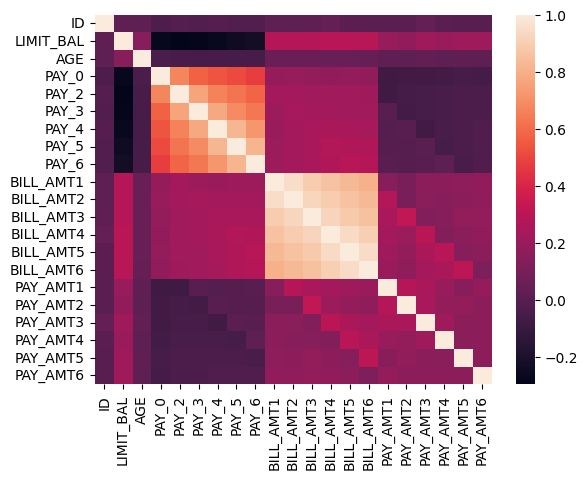

In [17]:
corr= real_data.corr()
sns.heatmap(corr)

/tmp/ipykernel_5571/1883774661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr2= new_data.corr()


<Axes: >

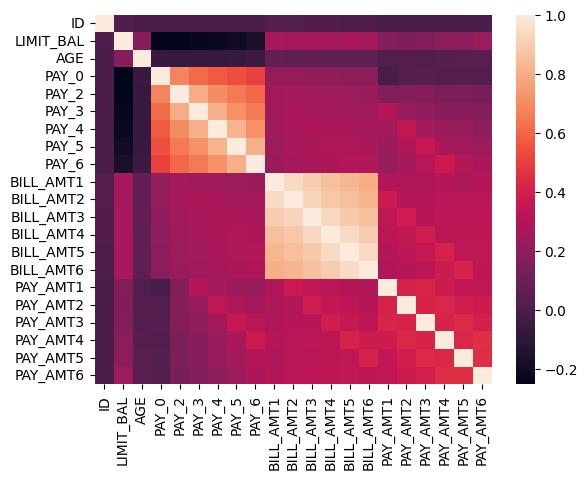

In [18]:
corr2= new_data.corr()
sns.heatmap(corr2)

<Axes: >

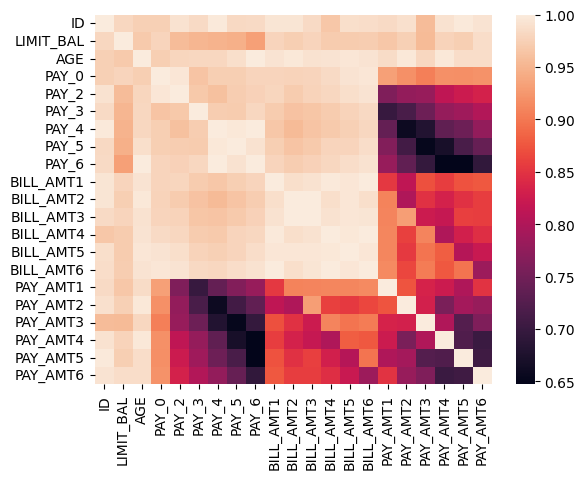

In [19]:
dif=1-abs(corr-corr2)
sns.heatmap(dif)

In [20]:
evaluate(new_data, real_data,metrics=['LogisticDetection'] )

/home/arnab/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arnab/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.19751588666666675

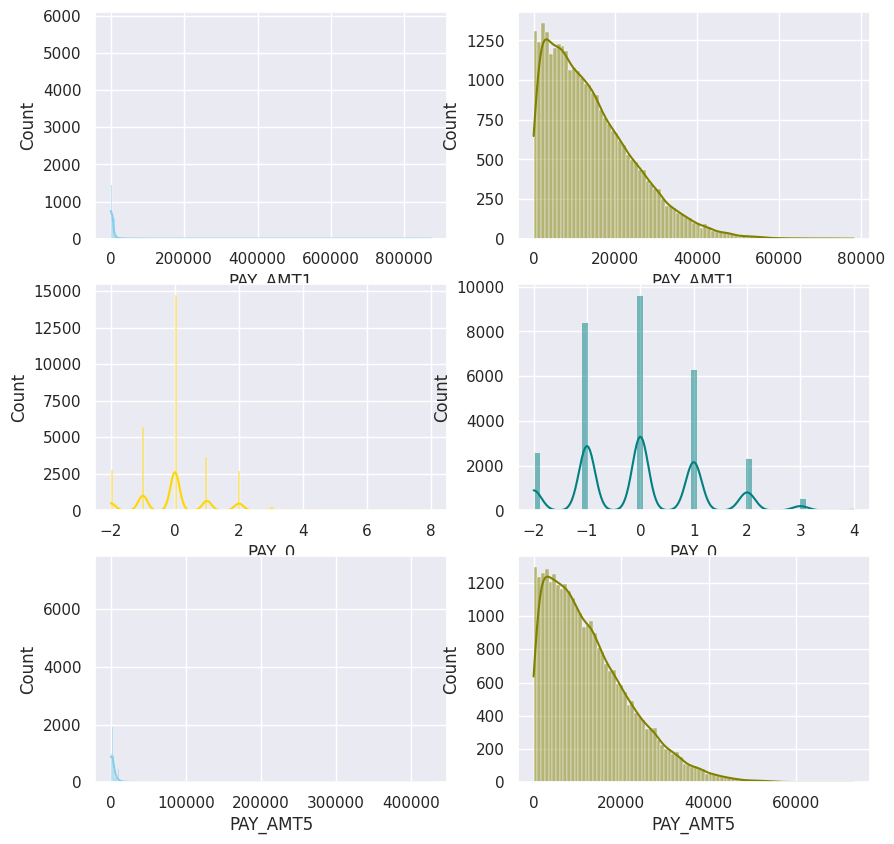

In [21]:
sns.set(style="darkgrid")


fig, axs = plt.subplots(3, 2, figsize=(10, 10))

sns.histplot(data=real_data, x="PAY_AMT1", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=new_data, x="PAY_AMT1", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=real_data, x="PAY_0", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=new_data, x="PAY_0", kde=True, color="teal", ax=axs[1, 1])

sns.histplot(data=real_data, x="PAY_AMT5", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=new_data, x="PAY_AMT5", kde=True, color="olive", ax=axs[2, 1])

plt.show()


<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

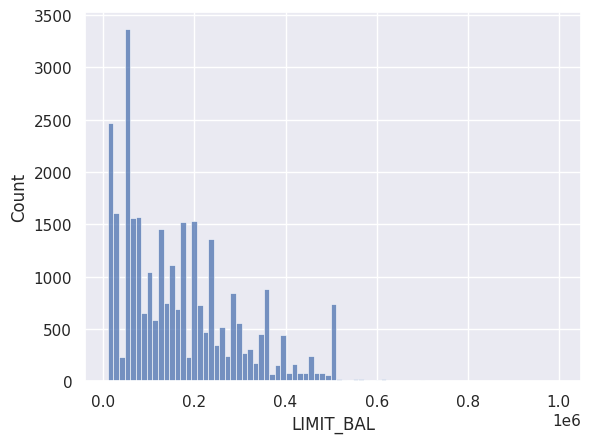

In [22]:
sns.histplot(data=real_data,x='LIMIT_BAL')

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

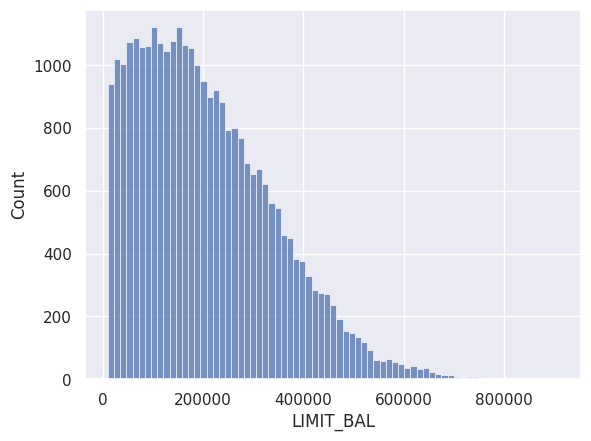

In [23]:
sns.histplot(data=new_data,x='LIMIT_BAL')

Now I will store the new synthesized data ,generated from the real dataset, into an excel file.

sd='new_data.xlsx'
new_data.to_excel(sd)

In many scenarios it will be convenient to generate synthetic versions of  data directly in systems that do not have access to the original data source.So I will make an file that will contain the parameters of the real data set and we can share that file and using SDV  we can sample date from it.

model.save('my_model.pkl')

loaded = GaussianCopula.load('my_model.pkl')
new_data2 = loaded.sample(200)

sd2='new_data2.xlsx'
new_data2.to_excel(sd2)

{
    "primary_key": "ID",
    "fields": {
        "ID": {
            "type": "id",
            "subtype": "integer",
            "regex": "U_[0-9]{3}"
        },
        "age": {
            "type": "numerical", 
            "subtype": "integer"
        },
        "address": {
            "type": "categorical",
            "pii": True
        }, 
        "tier": {
            "type": "categorical"
        },
        "active": {
            "type": "boolean"
        },
        "paid_amt": {
            "type": "numerical",
            "subtype": "float"
        },
        "renew_date": {
            "type": "datetime",
            "format": "%Y-%m-%d"
        }
    }
}

from sdmetrics.reports.single_table import QualityReport
report = QualityReport()
report.generate(real_data, new_data)


model1 = GaussianCopula(
    primary_key='ID'
)
model1.fit(real_data)

In [24]:
distributions = model.get_distributions()
distributions

{'LIMIT_BAL': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'SEX': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'EDUCATION': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'MARRIAGE': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'AGE': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'PAY_0': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'PAY_2': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'PAY_3': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'PAY_4': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'PAY_5': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'PAY_6': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'BILL_AMT1': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'BILL_AMT2': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'BILL_AMT3': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'BILL_AMT4': '

In [25]:
# use my_metadata_dict in the SDMetrics library
import json 

with open('metadata.json') as f:
    my_metadata_dict = json.load(f)


In [26]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()

In [27]:
report.generate(real_data, new_data, my_metadata_dict)

Creating report: 100%|████████████████████████████| 4/4 [00:05<00:00,  1.29s/it]



Overall Quality Score: 83.1%

Properties:
Column Shapes: 74.92%
Column Pair Trends: 91.29%


In [30]:
report.get_details(property_name='Column Shapes')
  

Column        Metric  Quality Score
0                    LIMIT_BAL  KSComplement       0.835300
1                          AGE  KSComplement       0.972433
2                        PAY_0  KSComplement       0.913100
3                        PAY_2  KSComplement       0.867067
4                        PAY_3  KSComplement       0.867667
5                        PAY_4  KSComplement       0.858600
6                        PAY_5  KSComplement       0.857700
7                        PAY_6  KSComplement       0.866933
8                    BILL_AMT1  KSComplement       0.763100
9                    BILL_AMT2  KSComplement       0.760867
10                   BILL_AMT3  KSComplement       0.758333
11                   BILL_AMT4  KSComplement       0.757267
12                   BILL_AMT5  KSComplement       0.731367
13                   BILL_AMT6  KSComplement       0.752167
14                    PAY_AMT1  KSComplement       0.472700
15                    PAY_AMT2  KSComplement       0.396000
16                    PAY_AMT3  KSComplement       0.425733
17                    PAY_AMT4  KSComplement       0.430967
18                    PAY_AMT5  KSComplement       0.436633
19                    PAY_AMT6  KSComplement       0.398567
20                         SEX  TVComplement       0.974133
21                   EDUCATION  TVComplement       0.974467
22                    MARRIAGE  TVComplement       0.990633
23  default.payment.next.month  TVComplement       0.918033

In [31]:
fig = report.get_visualization(property_name='Column Shapes')
fig.show()

In [32]:
fig1 = report.get_visualization(property_name='Column Pair Trends')
fig1.show()

In [33]:
from sdmetrics.column_pairs import CorrelationSimilarity

CorrelationSimilarity.compute(
    real_data=real_data[['PAY_AMT5', 'PAY_6']],
    synthetic_data=new_data[['PAY_AMT5', 'PAY_6']],
    coefficient='Pearson'
)

0.8236182123797999

In [34]:
from sdmetrics.reports import utils

fig = utils.get_column_pair_plot(
    real_data=real_data,
    synthetic_data=new_data,
    column_names=['PAY_AMT5', 'PAY_6'],
    metadata=my_metadata_dict
    
)

fig.show()

In [35]:
from sdmetrics.reports import utils

fig = utils.get_column_pair_plot(
    real_data=real_data,
    synthetic_data=new_data,
    column_names=['PAY_AMT2', 'PAY_6'],
    metadata=my_metadata_dict
    
)

fig.show()

In [36]:
from sdmetrics.reports import utils

fig = utils.get_column_plot(
    real_data=real_data,
    synthetic_data=new_data,
    column_name='PAY_AMT2',
    metadata=my_metadata_dict
)

fig.show()

In [37]:
from sdmetrics.reports.single_table import DiagnosticReport

report = DiagnosticReport()

In [38]:
report.generate(real_data, new_data,my_metadata_dict)

Creating report: 100%|████████████████████████████| 4/4 [04:17<00:00, 64.27s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

DANGER:
x The synthetic data is missing more than 50% of the numerical ranges present in the real data


In [39]:
report.get_properties()

{'Coverage': 0.5666342005190673, 'Synthesis': 1.0, 'Boundaries': 1.0}

In [40]:
report.get_details(property_name='Coverage')

Column            Metric  Diagnostic Score
0                    LIMIT_BAL     RangeCoverage          0.908166
1                          AGE     RangeCoverage          0.948276
2                        PAY_0     RangeCoverage          0.600000
3                        PAY_2     RangeCoverage          0.700000
4                        PAY_3     RangeCoverage          0.800000
5                        PAY_4     RangeCoverage          0.800000
6                        PAY_5     RangeCoverage          0.800000
7                        PAY_6     RangeCoverage          0.900000
8                    BILL_AMT1     RangeCoverage          0.472303
9                    BILL_AMT2     RangeCoverage          0.437252
10                   BILL_AMT3     RangeCoverage          0.286844
11                   BILL_AMT4     RangeCoverage          0.462956
12                   BILL_AMT5     RangeCoverage          0.406698
13                   BILL_AMT6     RangeCoverage          0.393465
14                    PAY_AMT1     RangeCoverage          0.089689
15                    PAY_AMT2     RangeCoverage          0.069530
16                    PAY_AMT3     RangeCoverage          0.088478
17                    PAY_AMT4     RangeCoverage          0.110148
18                    PAY_AMT5     RangeCoverage          0.171592
19                    PAY_AMT6     RangeCoverage          0.153823
20                         SEX  CategoryCoverage          1.000000
21                   EDUCATION  CategoryCoverage          1.000000
22                    MARRIAGE  CategoryCoverage          1.000000
23  default.payment.next.month  CategoryCoverage          1.000000

In [41]:
fig = report.get_visualization(property_name='Coverage')
fig.show()

In [42]:
from sdmetrics.single_table import GMLogLikelihood

GMLogLikelihood.compute(
    real_data=real_data,
    synthetic_data=new_data
)

-181.86983614700048

In [43]:
from sdmetrics.single_table import BinaryAdaBoostClassifier, BinaryDecisionTreeClassifier, BinaryLogisticRegression, BinaryMLPClassifier    



BinaryLogisticRegression.compute(
    test_data=real_data,
    train_data=new_data,
    target='default.payment.next.month',
    metadata=my_metadata_dict
)

/home/arnab/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.38710488280022626

In [44]:
from sdmetrics.single_table.efficacy.mlefficacy import MLEfficacy
MLEfficacy.compute(real_data,new_data,my_metadata_dict,target='default.payment.next.month')

/home/arnab/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arnab/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.



In [45]:
from sdmetrics.single_table import NumericalMLP

NumericalMLP.compute(
    real_data=real_data,
    synthetic_data=new_data,
    key_fields=['BILL_AMT1', 'PAY_AMT1','PAY_0'],
    sensitive_fields=['LIMIT_BAL']
)

/home/arnab/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/arnab/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/home/arnab/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning:

invalid value encountered in sqrt

/home/arnab/.local/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5574: RuntimeWarning:

divide by zero encountered in divide

/home/arnab/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning:

invalid value encountered in scalar multiply



0.1642256781464196

In [46]:
from sdmetrics.single_table import CategoricalZeroCAP

score = CategoricalZeroCAP.compute(
    real_data=real_data,
    synthetic_data=new_data,
    key_fields=['PAY_0', 'SEX','MARRIAGE'],
    sensitive_fields=['EDUCATION'])

In [47]:
score

0.6251095862657673

In [48]:
from sdmetrics.single_table import CategoricalCAP

score = CategoricalCAP.compute(
    real_data=real_data,
    synthetic_data=new_data,
    key_fields=['PAY_0', 'SEX','MARRIAGE'],
    sensitive_fields=['EDUCATION'])

In [ ]:
score


In [ ]:
from sdv.tabular import GaussianCopula
model = GaussianCopula(
   primary_key='ID',
     field_distributions={
           'PAY_AMT1': 'gamma',
           'PAY_AMT2': 'gamma',
           'PAY_AMT3': 'gamma',
           'PAY_AMT4': 'gamma',
           'PAY_AMT5': 'gamma',
           'PAY_AMT6': 'gamma'
         
        },
       enforce_min_max_values=True
   )

In [ ]:
model.fit(real_data)

In [ ]:
model.get_distributions()

In [ ]:
synd=model.sample(30000)
synd.head()

In [ ]:
synd.PAY_2.value_counts()

In [ ]:
real_data.PAY_2.value_counts()

In [ ]:
new_data.PAY_2.value_counts()

In [ ]:
from sdmetrics.reports import utils

fig = utils.get_column_plot(
    real_data=real_data,
    synthetic_data=new_data,
    column_name='PAY_AMT2',
    metadata=my_metadata_dict
)

fig.show()

In [21]:
from rdt.transformers.numerical import ClusterBasedNormalizer
cbe = ClusterBasedNormalizer()

In [25]:
trs=cbe.transform(real_data)

TypeError: 'NoneType' object is not iterable